<a href="https://colab.research.google.com/github/luongduong147/ensemble-learning-credit-classification-/blob/main/Ensemble_learning_credit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data overview**

Background of the Study This example concerns a bank with a rapidly expanding customer base. Depositors make up the great bulk of these customers. The bank’s client base is restricted, and it needs to expand to bring in more loan business and produce more revenue from interest on loans. Other strategies for turning their clients to personal loan customers are being investigated by management.

Objectives of the Study The bank wants to create a method that would help them identify those customers who are more likely to take out a loan, boosting their success rate while cutting campaign expenditures.

Scope of the Study The data set contains 5000 observations containing 14 factors separated into four testing groups. Personal loan, securities account, CD account, internet banking, and credit card are among the five factors in the binary category. Age, experience, income CC average, and mortgage are among the five factors in the interval category. The ordinal category includes the variables family and education. Finally, there is a nominal category including ID and ZIP code. Because the variable ID provides no useful information, it will be ignored in the problem

**2. Description of the variables in the data**
• ID: Customer ID

• Age: Customer’s age in completed years

• Experience: #years of professional experience

• Income: Annual income of the customer ($000)

• ZIP Code: Home Address ZIP code.

• Family: Family size of the customer

• CCAvg: Avg. spending on credit cards per month ($000)

• Education: Education Level.

1: Undergrad

2: Graduate

3: Advanced/Professional  
• Mortgage: Value of house mortgage if any. ($000)

• Personal Loan: Did this customer accept the personal loan offered in the last campaign?

• Securities Account: Does the customer have a securities account with the bank?

• CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

• Online: Does the customer use internet banking facilities?

• Credit card: Does the customer use a credit card issued by Universal Bank?

**3.Data preprocessing**

In [1]:
#libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading the data
df=pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#checking the missing value
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

Dataset has 5000 rows of observations and 14 variables. Looking at the dataset we realize the following aspects (raw check):

The ID and zip code columns are basically additional information and are not very useful for analysis.

Experience has a negative value, we will fix them with more meaningful and appropriate positive values.

Sections like Personal Loan, CD Account, Online ,… are factor esteems with levels “0” and “1” . Save Education which is requested variable with 3 levels 1 < 2 < 3

In [7]:
#summary the data
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
#Removing the ID and Zip code column from the data set.
df=df.drop(['ID','ZIP.Code'],1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


3.** Exploratory Data Analysis** 

Histogram Distributions of Dataset

Plotting the histogram for all numerical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a83dbef10>,
      dtype=object)

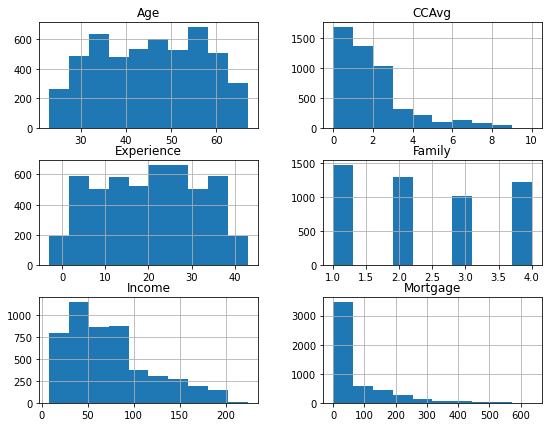

In [18]:
df.hist(['Age','CCAvg','Experience','Family','Income','Mortgage'],figsize=[9,7])


**BoxPlots by Education classes**
Insight

Credit Card and Mortagage predictors have lots of outliers accross all three levels of Education

Income has lots of outliers in Grad and Advanced professionals

Plotting boxplot by factor of Education for all the numerical variables

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

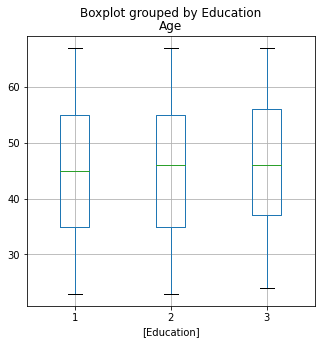

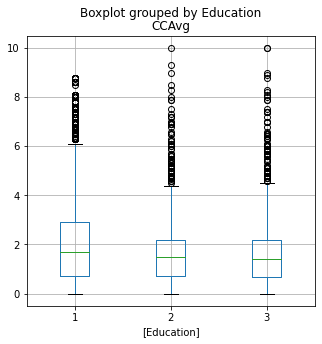

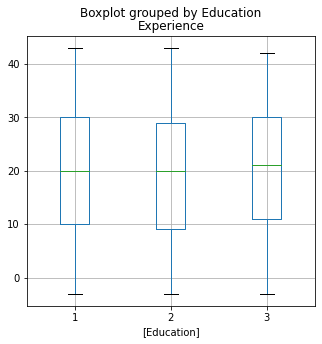

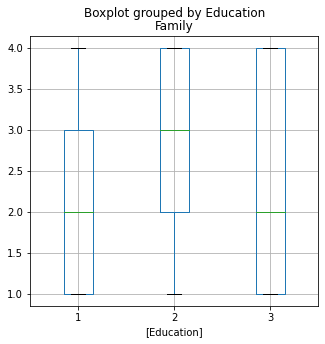

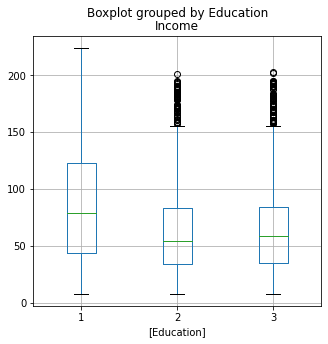

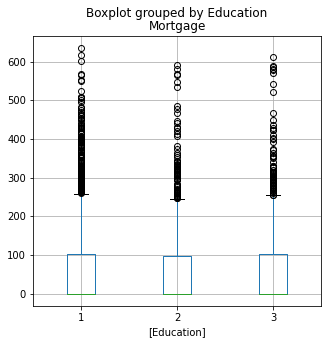

In [36]:
df.boxplot(column=['Age'],by=['Education'],figsize=[5,5])
df.boxplot(column=['CCAvg'],by=['Education'],figsize=[5,5])
df.boxplot(column=['Experience'],by=['Education'],figsize=[5,5])
df.boxplot(column=['Family'],by=['Education'],figsize=[5,5])
df.boxplot(column=['Income'],by=['Education'],figsize=[5,5])
df.boxplot(column=['Mortgage'],by=['Education'],figsize=[5,5])

**Boxplots by Personal Loan classes**

Lots of “No” (Class 0) Personal loan takers are present as outliers in Credit Card, Mortgge and Income predictors Plotting boxplot for Personal Loan (Response variable) for all numerical variables

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

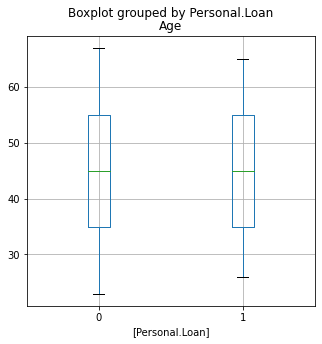

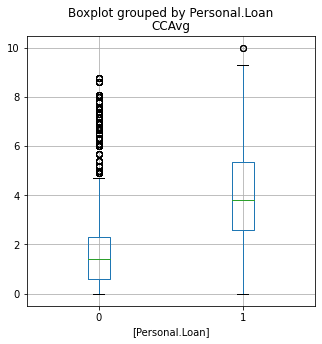

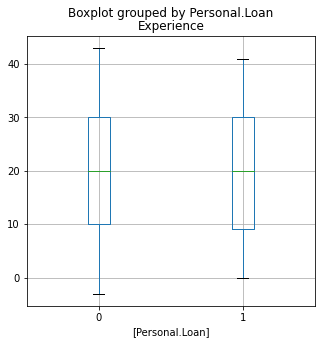

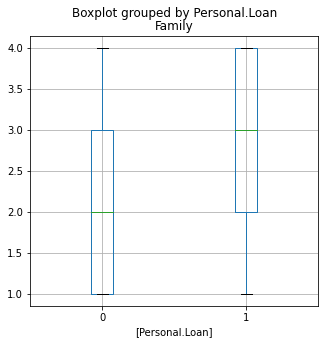

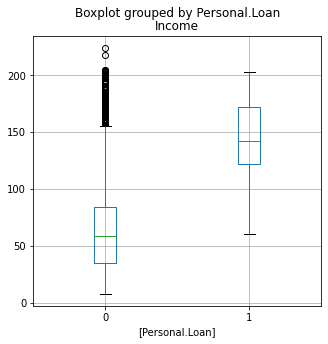

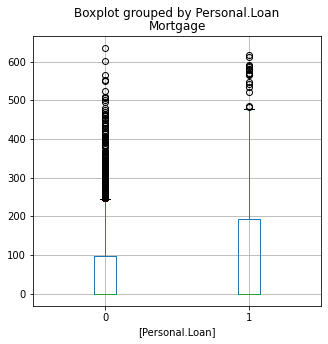

In [37]:
df.boxplot(column=['Age'],by=['Personal.Loan'],figsize=[5,5])
df.boxplot(column=['CCAvg'],by=['Personal.Loan'],figsize=[5,5])
df.boxplot(column=['Experience'],by=['Personal.Loan'],figsize=[5,5])
df.boxplot(column=['Family'],by=['Personal.Loan'],figsize=[5,5])
df.boxplot(column=['Income'],by=['Personal.Loan'],figsize=[5,5])
df.boxplot(column=['Mortgage'],by=['Personal.Loan'],figsize=[5,5])

**Credit Card**

is very good indicator of who we can target bothways

Prospects who spend more may have to take care of their obligation by taking Personal Loan

Other classification is who have great pay however wonder whether or not to spend can be offered advances on great conditions for their way of life and individual requirements

Virtually People having income in 1st quartile i.e. between 38 K to 90K have no Personal loans and moderate Credit Card spending (under 3000)

People earning between 40K to 100K and having CC spend less than $ 2500 can become good prime targets keeping other predictors constant and we see a good chunk of them in graph

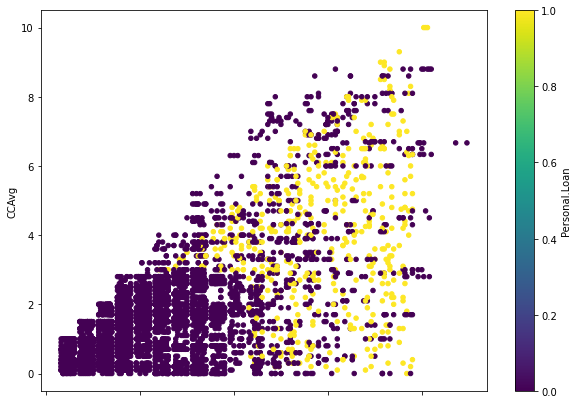

In [40]:
df.plot.scatter(x='Income',y='CCAvg',c='Personal.Loan',figsize=[10,7],colormap='viridis')

**Mortgage**

is another good indicator of who can be targeted

By offering good terms to people having zero Mortgage

Others under considerate Mortgage like lets say 150K to settle their loans of high interest with low interest Personal Loans

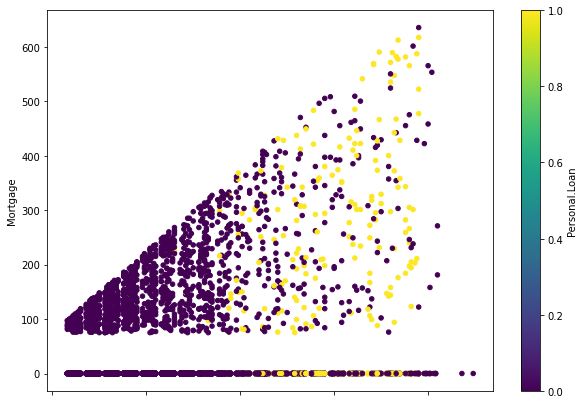

In [41]:
df.plot.scatter(x='Income',y='Mortgage',c='Personal.Loan',figsize=[10,7],colormap='viridis')

**Modeling**
1. Bagging - randomforest


In [62]:
#train_test_split
from sklearn.model_selection import train_test_split
x=df.drop(['CreditCard'],1)
y=df['CreditCard'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online
4227,32,7,111,1,3.8,1,0,0,1,0,0
4676,39,13,68,3,2.1,1,0,0,1,0,1
800,31,7,173,1,6.0,1,0,0,0,0,1
3671,50,25,18,1,0.4,3,0,0,0,0,1
4193,62,37,31,3,0.2,1,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


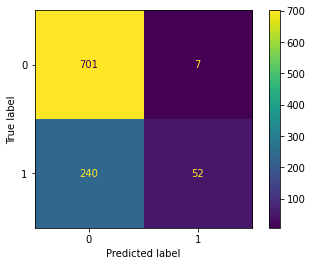

In [70]:
#Bagging with random forest
from sklearn.ensemble import RandomForestClassifier
my_forest=RandomForestClassifier(n_estimators=8,criterion="gini",max_depth=5)
my_forest.fit(x_train,y_train)
#Model predict and testing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pred=my_forest.predict(x_test)
cm=confusion_matrix(y_test,pred)
plot_confusion_matrix(my_forest,x_test,y_test)


2. Boosting with XGBoost


Accuracy (%) 0.75


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


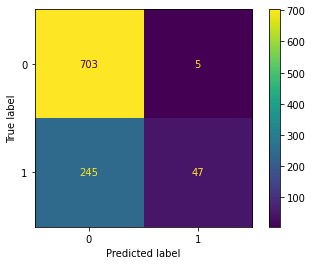

In [65]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=8,max_depth=5,eta=0.1,subsample=0.6)
model.fit(x_train,y_train)
model
#evaluation
acc=model.score(x_test,y_test)
print("Accuracy (%)",acc*100)
#predict 
xgb_pred=model.predict(x_test)
plot_confusion_matrix(model,x_test,y_test)


**Selection**

From 2 model above, look at the confusion matrix, we can see that XGB works better than random forest with a little predicted value accurated higher than random forest. May the XGB have high performance than random forest with a larger dataset. 